In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] == 300

False

# Data Exploration

In [2]:
# reading the dataset
df = pd.read_csv(r"..\Data\house_prices.csv")

In [3]:
# looking at the data
display(df.head(5),df.sample(5),df.tail(5))

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5950,Super built-up Area,18-Jun,JP Nagar,3 BHK,NaN,1275,3.0,2.0,41.20
10420,Super built-up Area,Ready To Move,Budigere,2 BHK,PrityTr,1162,2.0,1.0,58.00
525,Super built-up Area,Ready To Move,KR Puram,2 BHK,Jahidva,1155,2.0,2.0,42.74
5416,Super built-up Area,Ready To Move,Vittasandra,2 BHK,NaN,1246,2.0,1.0,67.40
4575,Plot Area,Ready To Move,Medi Agrahara,4 Bedroom,NaN,1350,4.0,2.0,85.00


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
# checking the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Inference:**

- there are 13320 records with 8 columns.
- total_sqft, bath, balcony, price are the float64 values rest are of object data type.
- there seem to have misssing values in the data.

In [5]:
# checking the central tencendy of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


**Inference:**

- There is a posibility of outliers as there is property with 40 number of baths which is extremely rare. Every property has minimum 1 bathrom with average of 2 bathrooms.
- There number of balcony varies from minimum 0 to maximum 3.
- The price column is not interpretable at the moment.

# Data Cleaning:

In [6]:
# checking for missing values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

- We will be dropping availiblity, area_type, and society columns as they will not help to predict prices and overall predictive ability.

- we will be droping society column as well, as it have too many missing values.

- we will be treating the other columns as required.

In [7]:
df = df.drop(['availability','area_type','society','balcony'],axis = 1)

We will be droping the other columns missing values as they are small in number.

In [8]:
# droping the na values
df = df.dropna()
# checking the data
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

We can see some inconsistency in size column. We will be checking the same for other columns as well.

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [13]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [14]:
# creating new column with just the number of bedrooms and adding it in the dataset
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))
# droping the orignal size column 
df = df.drop(['size'],axis = 1)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In the total_sqft column there are values containing the ranges of so we will be avaeraging the range and work with the mean value.

In [15]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [16]:
df[~df['total_sqft'].apply(is_float)].sample(5)

,location,total_sqft,bath,price,bhk
4226,Whitefield,524 - 894,1.0,34.385,1
6953,Hosa Road,142.61Sq. Meter,3.0,109.000,3
6333,Harohalli,2.09Acres,2.0,200.000,2
9200,Hoodi,2041 - 2090,4.0,91.915,4
5887,Rajaji Nagar,2563 - 2733,5.0,251.500,4


In [17]:
# creating a function tp avergae the ranges 

def convert_sqft(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
# applying the function and storing it 
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.sample(5)

,location,total_sqft,bath,price,bhk
9881,Bannerghatta,1113.0,2.0,70.0,2
2540,Whitefield,1215.0,2.0,65.0,2
7960,Bisuvanahalli,845.0,2.0,30.0,2
12118,R.T. Nagar,1500.0,2.0,45.0,2
943,Kundalahalli,1047.0,2.0,82.0,2


In [19]:
# dropping these values as well
display(df.shape)
df = df.dropna()
df.shape

(13246, 5)

(13200, 5)

In [20]:

df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [21]:
# looking at all the records that have more than 20 bedrooms
df[df['bhk']>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000.0,27.0,230.0,27
4684,Munnekollal,2400.0,40.0,660.0,43


If we look above we the the area of 43 and 27 bhk are way to less to acomodate 43 rooms with 40 bathrooms and 27 rooms with 27 bathrooms. so we will romove such descripancies as well.  

In [22]:

print(df.shape)
# removing all the column that have discrepencies in total_sqft
df = df[~(df['total_sqft']/df['bhk']<450)]
df.shape


(13200, 5)


(10627, 5)

In [23]:
# creating the price per sqft column
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.sample(5)

,location,total_sqft,bath,price,bhk,price_per_sqft
7386,RMV,2075.0,3.0,175.00,3,8433.734940
13238,Hennur Bande,1200.0,2.0,70.00,2,5833.333333
11485,Jigani,918.0,2.0,56.00,2,6100.217865
10411,Haralur Road,1225.0,2.0,69.84,2,5701.224490
5734,Raja Rajeshwari Nagar,1235.0,2.0,75.00,2,6072.874494


In [24]:

#We can certainly perform some dimensionality reduction on location column because as for a categorical column, 
# it has a lot of distinct values
df.location.nunique()

1088

In [25]:

# So we can classify those locations as other locations
location_grouped = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
other_locations = location_grouped[location_grouped<=10]

In [26]:

display(df.location.nunique())
df.location = df.location.apply(lambda x: 'other' if x in other_locations else x)
df.location.nunique()

1088

194


Now we have 194 column, which is good because when converting it into categorical data, we won't have to deal with 1000 new columns, 200 is much more managable

# Outlier Treatment

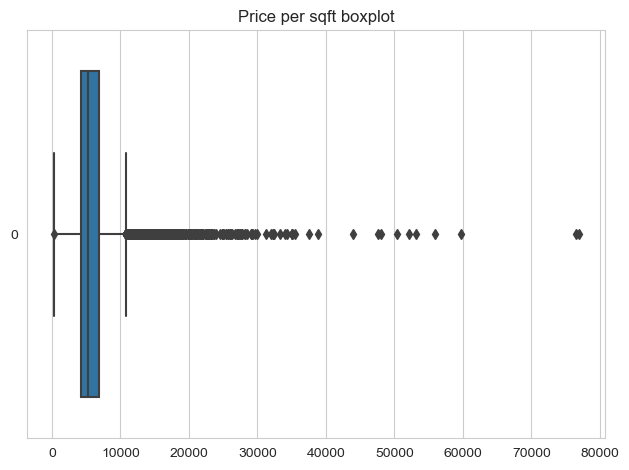

In [27]:
sns.boxplot(df['price_per_sqft'], orient='h')
plt.title('Price per sqft boxplot')
plt.tight_layout()
plt.show()

There are heafty amount of outliers in the price_per_sqft column we will be treaing it by using Isolation Forest.

In [28]:
X = df[['total_sqft','bath','price','bhk','price_per_sqft']]

In [81]:
# fitting the model
iso = IsolationForest(contamination = 0.35)
preds = iso.fit_predict(X)


c:\Users\PRANJAL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [82]:
# Add outlier predictions to the data
df['outlier'] = preds

In [83]:
# Filter and print outliers
outliers = df[df['outlier'] == -1]
print("Outliers using Isolation Forest:")
print(outliers)

Outliers using Isolation Forest:
                location  total_sqft  bath  price  bhk  price_per_sqft  \
1       Chikka Tirupathi      2600.0   5.0  120.0    4     4615.384615   
6       Old Airport Road      2732.0   4.0  204.0    4     7467.057101   
7           Rajaji Nagar      3300.0   4.0  600.0    4    18181.818182   
10            Whitefield      1800.0   2.0   70.0    3     3888.888889   
11            Whitefield      2785.0   5.0  295.0    4    10592.459605   
...                  ...         ...   ...    ...  ...             ...   
13308  Bannerghatta Road      1527.0   3.0  142.0    3     9299.279633   
13315         Whitefield      3453.0   4.0  231.0    5     6689.834926   
13316              other      3600.0   5.0  400.0    4    11111.111111   
13318    Padmanabhanagar      4689.0   4.0  488.0    4    10407.336319   
13319       Doddathoguru       550.0   1.0   17.0    1     3090.909091   

       outlier  
1           -1  
6           -1  
7           -1  
10        

In [85]:
df.sample(10)

,location,total_sqft,bath,price,bhk,price_per_sqft,outlier
3639,Kannamangala,2400.0,4.0,130.00,4,5416.666667,-1
6871,Electronic City,1130.0,2.0,32.63,2,2887.610619,1
276,Balagere,1210.0,2.0,80.90,2,6685.950413,1
4851,Ramamurthy Nagar,1200.0,2.0,78.00,2,6500.000000,1
12498,Vittasandra,1404.0,2.0,67.50,2,4807.692308,1
11421,other,1090.0,2.0,32.00,2,2935.779817,1
1726,Whitefield,1280.0,2.0,85.00,2,6640.625000,1
9950,Whitefield,1015.0,2.0,45.00,2,4433.497537,1
3574,Kannamangala,1262.0,2.0,55.00,2,4358.161648,1
1070,Vasanthapura,1135.0,2.0,39.73,2,3500.440529,1


In [86]:
# Filter and drop outliers
df_cleaned = df[df['outlier'] == 1].copy()  # Keep only inliers
df_cleaned.drop(columns=['outlier'], inplace=True)  # Drop the 'outlier' column

    

In [93]:
# looking at the cleaned data
df_cleaned

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...
13309,Yeshwanthpur,1675.0,3.0,92.13,3,5500.298507
13310,Rachenahalli,1050.0,2.0,52.71,2,5020.000000
13312,Bellandur,1262.0,2.0,47.00,2,3724.247227
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245


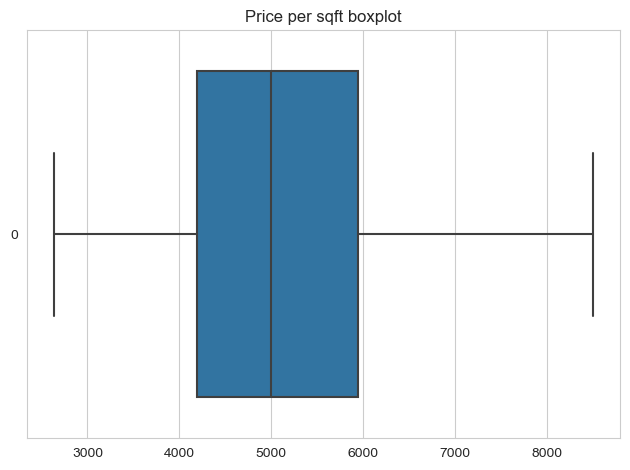

In [88]:
# boxplot after treating the outliers.
sns.boxplot(df_cleaned['price_per_sqft'], orient='h')
plt.title('Price per sqft boxplot')
plt.tight_layout()
plt.show()

In [94]:
# storing the cleaned data in csv format for model devlopment
df_cleaned.to_csv("..\Data\house_prices_cleaned.csv",index = False)

<strong>Author</strong> <br>
    Pranjal Dhamane <hr>
    <b>Thanks for reading my code, ⭐ Star my repository if you find it useful</b><br>
    <div>
        <ul>
            <li><a href="https://www.linkedin.com/in/pranjal-dhamane/">LinkedIn</a></li>
            <li><a href="https://www.credly.com/users/pranjal-dhamane/badges">Credly</a></li>
        </ul>
    </div>
